In [1]:
import numpy as np
import pandas as pd
from munch import Munch
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
expt_data = 'Pressure,x1,y1\n0.0787366,0,0\n0.0787409,0.001,0.00105372\n0.0787366,0,0\n0.0787409,0.001,0.00105372\n0.078745,0.002,0.00210477\n0.0787491,0.003,0.00315314\n0.0787531,0.004,0.00419886\n0.0787607,0.006,0.00628235\n0.0787679,0.008,0.00835532\n0.0787747,0.01,0.0104178\n0.0788023,0.02,0.0205761\n0.0788199,0.03,0.0304833\n0.0788277,0.04,0.0401479\n0.0788146,0.06,0.0587804\n0.0787651,0.08,0.076533\n0.0786813,0.1,0.0934606\n0.0783336,0.15,0.132491\n0.077811,0.2,0.16736\n0.0771393,0.25,0.198646\n0.0763418,0.3,0.226844\n0.0754384,0.35,0.25239\n0.0744455,0.4,0.275684\n0.0733743,0.45,0.297114\n0.0722295,0.5,0.31708\n0.0710063,0.55,0.336028\n0.0696857,0.6,0.354506\n0.0682274,0.65,0.373242\n0.0665569,0.7,0.393299\n0.0645438,0.75,0.416356\n0.0619637,0.8,0.445319\n0.0584273,0.85,0.485792\n0.0532464,0.9,0.550243\n0.0504618,0.92,0.588855\n0.0471061,0.94,0.640417\n0.0430249,0.96,0.712687\n0.0406514,0.97,0.760846\n0.0380161,0.98,0.820943\n0.0350837,0.99,0.897946\n0.034458,0.992,0.916011\n0.0338185,0.994,0.935146\n0.0331648,0.996,0.955447\n0.0328325,0.997,0.966069\n0.0324964,0.998,0.977025\n0.0321567,0.999,0.988329\n0.0318131,1,1\n'
expt = pd.read_csv(StringIO(expt_data)) # This is the experimental data to compare against

def add_columns(df):
    df['Ptotal'] = df['Pressure']
    df['P1'] = df['Pressure'] * df['y1']
    df['P2'] = df['Pressure'] - df['P1']
    df['x2'] = 1 - df['x1']
    df['y2'] = 1 - df['y1']
    return df

expt = add_columns(expt)

As derived in class, for an ideal solution, we have
$$
\begin{align*}
P_1& = x_1 P_1^* \\
P_2& = x_2 P_2^* \\
P_\text{total}& = P_1 + P_2
\end{align*}
$$
where $x_1, x_2$ is the mole fraction of component 1 and 2 in the liquid phase, $P_1^*, P_2^*$ are the vapor pressures of pure liquid 1 and 2 respectively. The total pressure, then, is

$$
P_\text{total} = x_1 P_1^* + x_2 P_2^* \,.
$$

Since $x_1 + x_2 = 1$, we can substitute $x_2 = 1 - x_1$ and get

$$
P_\text{total}(x_1) = x_1 P_1^* + (1-x_1) P_2^* \,.
$$


It is useful to define $y_1, y_2$ the mole fraction of components 1 and 2 in the vapor phase as well; assuming ideal gas behavior, $n_\text{1gas} \propto P_1$, so

$$
\begin{align}
y_1& = \frac{P_1}{P_\text{total}} \\
y_2& = \frac{P_2}{P_\text{total}} 
\end{align}
$$

Here's the example from class as simply as possible:

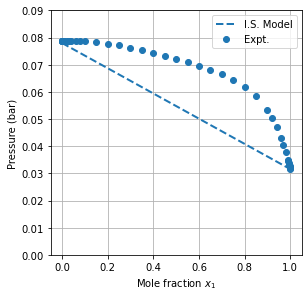

In [3]:
x1 = np.linspace(0, 1, 101) # Make an array of data points from x1 = 0 to x1 = 1
x2 = 1 - x1
P1pure = 0.0316 # bar, vapor pressure of H2O at 298 K
P2pure = 0.078 # bar, vapor pressure of EtOH at 298 K

Ptotal = x1 * P1pure + x2 * P2pure

plt.subplots(figsize=(4.5, 4.5))
l1, = plt.plot(x1, Ptotal, '--', label='I.S. Model', linewidth=2)
plt.plot(expt.x1, expt.Ptotal, 'o', color=l1.get_color(), label='Expt.')

plt.xlabel("Mole fraction $x_1$")
plt.ylabel("Pressure (bar)")

plt.ylim(0, 0.09)

plt.legend()
plt.grid()


We can see that the total vapor pressure according to the ideal solution model is a straight line between $P_\text{total}(x_1=0) = P_2^* = 0.078$ bar at $x_1 = 0$ (a pure ethanol liquid phase) and $P_\text{total}(x_1 = 1) = P_1^* = 0.0316$ bar at $x_1=1$ (a pure water liquid phase).

## Another option

Let's write this as a nice Python function. We'll do this just like we did for the statistical mechanics models. The inputs to our theory are the vapor pressures of the pure liquids and the mole fraction of component 1.

In [4]:
def binary_mixture(x1, P1pure, P2pure):
    # Define all of the key variables here:
    x2 = 1 - x1
    
    # Define P1, P2, Ptotal, y1, y2 below
    
    return Munch(locals()) # This will return all variables we have defined inside the function...

The example from class:

In [5]:
x1 = np.linspace(0, 1, 101) # Make an array of data points from x1 = 0 to x1 = 1
bm1 = binary_mixture(x1, P1pure=0.0316, P2pure=0.078)

# Use bm1.x1, bm1.x2, bm1.P1, etc to refer to the individual columns of data...
bm1.x2

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])